In [1]:
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [3]:
import sys
sys.path.append('/u/wangnisn/devel/Machine_learning_dynamics/bayesian')

In [4]:
import scipy
from scipy.io import loadmat
from data_generator import DataGenerator

In [5]:
from likelihood import GaussianLogLikelihood
from prior import ComplexityLogPrior
from posterior import LogPosterior
from mcmc import MCMC
from sequential_mc import SequentialMC
from util import generate_binary_coef_random
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
from nn_smoothing_2D import NNSmoothing2D

In init py ['/talos/u/wangnisn/devel/Machine_learning_dynamics/examples/phase_field_twoD_alpha0.1', '', '/mpcdf/soft/SLE_15/packages/x86_64/keras/anaconda_3_2019.03-2019.03/2.3.1/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/skylake/tensorflow/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.14.0/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/skylake/pytorch/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.2.0/lib/python3.7/site-packages', '/u/wangnisn/kaggle/defect_in_steel/version3/code/dummy_11a', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python37.zip', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7/lib-dynload', '/u/wangnisn/.local/lib/python3.7/site-packages', '/u/wangnisn/.local/lib/python3.7/site-packages/pystem-0.0.13-py3.7-linux-x86_64.egg', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7/site-packages', '/mpcdf/soft/

W0601 18:18:13.079833 47288537058688 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
W0601 18:18:13.115977 47288537058688 deprecation_wrapper.py:119] From /u/wangnisn/devel/Machine_learning_dynamics/bayesian/nn_smoothing_2D.py:14: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



In [8]:
data = np.load('/u/wangnisn/devel/Machine_learning_dynamics/data/phase_field_twoD_last641.npy')

In [9]:
data.shape

(641, 424, 224)

In [10]:
data = data[300:400]

In [11]:
data = data[:,200:320,:]

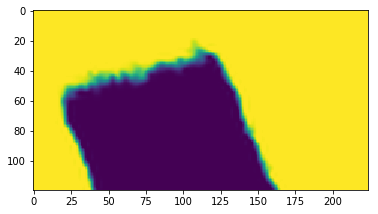

In [12]:
plt.imshow(data[4])

In [13]:
data.shape

(100, 120, 224)

In [14]:
shape = data.shape

In [15]:
t = np.arange(shape[0])
x = np.arange(shape[1])
y = np.arange(shape[2])
t_mesh,x_mesh, y_mesh = np.meshgrid(t,x,y,indexing='ij')
t = t_mesh.flatten()
x = x_mesh.flatten()
y = y_mesh.flatten()

In [16]:
u = data.flatten()

In [17]:
u.shape

(2688000,)

In [18]:
del data

In [19]:
n_samples = 100000

In [20]:
from sklearn.utils import shuffle

In [21]:
u, x, y, t= shuffle(u,x,y,t, random_state=1001)

In [22]:
u = u[:n_samples]
x = x[:n_samples]
y = y[:n_samples]
t = t[:n_samples]

In [23]:
hidden_layers = [ 20, 20, 20, 20, 20, 20, 20, 20,20,20]

In [24]:
u.shape

(100000,)

In [25]:
nnsmooth = NNSmoothing2D(x=x, y=y,t=t,u=u, hidden_layers=hidden_layers,alpha=0.1)

W0601 18:18:16.787013 47288537058688 deprecation_wrapper.py:119] From /u/wangnisn/devel/Machine_learning_dynamics/bayesian/nn_smoothing_2D.py:82: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0601 18:18:16.873883 47288537058688 deprecation_wrapper.py:119] From /u/wangnisn/devel/Machine_learning_dynamics/bayesian/nn_smoothing_2D.py:37: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0601 18:18:16.875941 47288537058688 deprecation_wrapper.py:119] From /u/wangnisn/devel/Machine_learning_dynamics/bayesian/nn_smoothing_2D.py:37: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0601 18:18:17.811430 47288537058688 deprecation_wrapper.py:119] From /u/wangnisn/devel/Machine_learning_dynamics/bayesian/nn_smoothing_2D.py:39: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0601 18:18:22.368011 47288537058688 lazy_loader.py:50] 
The TensorFlow contr

In [26]:
nnsmooth.train(10000)

It: 0, Loss: 6.846e-01, Time: 12.33
It: 10, Loss: 2.539e-01, Time: 2.46
It: 20, Loss: 1.653e-01, Time: 2.47
It: 30, Loss: 1.308e-01, Time: 2.45
It: 40, Loss: 1.247e-01, Time: 2.45
It: 50, Loss: 1.233e-01, Time: 2.46
It: 60, Loss: 1.227e-01, Time: 2.46
It: 70, Loss: 1.219e-01, Time: 2.45
It: 80, Loss: 1.211e-01, Time: 2.46
It: 90, Loss: 1.203e-01, Time: 2.50
It: 100, Loss: 1.193e-01, Time: 2.44
It: 110, Loss: 1.180e-01, Time: 2.50
It: 120, Loss: 1.161e-01, Time: 2.47
It: 130, Loss: 1.131e-01, Time: 2.49
It: 140, Loss: 1.082e-01, Time: 2.48
It: 150, Loss: 9.996e-02, Time: 2.43
It: 160, Loss: 8.780e-02, Time: 2.51
It: 170, Loss: 7.377e-02, Time: 2.44
It: 180, Loss: 5.847e-02, Time: 2.45
It: 190, Loss: 4.652e-02, Time: 2.48
It: 200, Loss: 3.964e-02, Time: 2.50
It: 210, Loss: 3.432e-02, Time: 2.46
It: 220, Loss: 3.213e-02, Time: 2.45
It: 230, Loss: 3.065e-02, Time: 2.47
It: 240, Loss: 2.904e-02, Time: 2.48
It: 250, Loss: 2.751e-02, Time: 2.49
It: 260, Loss: 2.607e-02, Time: 2.46
It: 270, Lo

It: 2190, Loss: 4.951e-03, Time: 2.53
It: 2200, Loss: 4.855e-03, Time: 2.54
It: 2210, Loss: 4.822e-03, Time: 2.51
It: 2220, Loss: 4.847e-03, Time: 2.54
It: 2230, Loss: 5.314e-03, Time: 2.53
It: 2240, Loss: 4.966e-03, Time: 2.50
It: 2250, Loss: 4.826e-03, Time: 2.54
It: 2260, Loss: 4.812e-03, Time: 2.54
It: 2270, Loss: 4.826e-03, Time: 2.56
It: 2280, Loss: 4.872e-03, Time: 2.53
It: 2290, Loss: 4.890e-03, Time: 2.55
It: 2300, Loss: 4.813e-03, Time: 2.51
It: 2310, Loss: 4.802e-03, Time: 2.55
It: 2320, Loss: 4.954e-03, Time: 2.56
It: 2330, Loss: 4.823e-03, Time: 2.56
It: 2340, Loss: 4.906e-03, Time: 2.55
It: 2350, Loss: 4.802e-03, Time: 2.57
It: 2360, Loss: 4.825e-03, Time: 2.56
It: 2370, Loss: 4.810e-03, Time: 2.54
It: 2380, Loss: 4.853e-03, Time: 2.52
It: 2390, Loss: 4.892e-03, Time: 2.56
It: 2400, Loss: 4.767e-03, Time: 2.53
It: 2410, Loss: 4.785e-03, Time: 2.57
It: 2420, Loss: 5.081e-03, Time: 2.54
It: 2430, Loss: 4.768e-03, Time: 2.57
It: 2440, Loss: 4.812e-03, Time: 2.53
It: 2450, Lo

It: 4350, Loss: 4.527e-03, Time: 2.54
It: 4360, Loss: 4.608e-03, Time: 2.53
It: 4370, Loss: 4.533e-03, Time: 2.57
It: 4380, Loss: 4.485e-03, Time: 2.51
It: 4390, Loss: 4.469e-03, Time: 2.52
It: 4400, Loss: 4.479e-03, Time: 2.54
It: 4410, Loss: 4.780e-03, Time: 2.53
It: 4420, Loss: 4.532e-03, Time: 2.51
It: 4430, Loss: 4.461e-03, Time: 2.55
It: 4440, Loss: 4.526e-03, Time: 2.53
It: 4450, Loss: 4.463e-03, Time: 2.55
It: 4460, Loss: 4.460e-03, Time: 2.51
It: 4470, Loss: 4.545e-03, Time: 2.50
It: 4480, Loss: 4.514e-03, Time: 2.52
It: 4490, Loss: 4.540e-03, Time: 2.55
It: 4500, Loss: 4.451e-03, Time: 2.52
It: 4510, Loss: 4.512e-03, Time: 2.54
It: 4520, Loss: 4.516e-03, Time: 2.57
It: 4530, Loss: 4.449e-03, Time: 2.56
It: 4540, Loss: 4.455e-03, Time: 2.56
It: 4550, Loss: 4.666e-03, Time: 2.52
It: 4560, Loss: 4.455e-03, Time: 2.54
It: 4570, Loss: 4.461e-03, Time: 2.55
It: 4580, Loss: 4.497e-03, Time: 2.57
It: 4590, Loss: 4.455e-03, Time: 2.54
It: 4600, Loss: 4.440e-03, Time: 2.55
It: 4610, Lo

It: 6510, Loss: 4.286e-03, Time: 2.52
It: 6520, Loss: 4.324e-03, Time: 2.55
It: 6530, Loss: 4.405e-03, Time: 2.53
It: 6540, Loss: 4.326e-03, Time: 2.53
It: 6550, Loss: 4.294e-03, Time: 2.53
It: 6560, Loss: 4.280e-03, Time: 2.56
It: 6570, Loss: 4.290e-03, Time: 2.54
It: 6580, Loss: 4.429e-03, Time: 2.53
It: 6590, Loss: 4.294e-03, Time: 2.55
It: 6600, Loss: 4.328e-03, Time: 2.52
It: 6610, Loss: 4.281e-03, Time: 2.54
It: 6620, Loss: 4.277e-03, Time: 2.52
It: 6630, Loss: 4.342e-03, Time: 2.51
It: 6640, Loss: 4.343e-03, Time: 2.53
It: 6650, Loss: 4.321e-03, Time: 2.54
It: 6660, Loss: 4.296e-03, Time: 2.53
It: 6670, Loss: 4.283e-03, Time: 2.54
It: 6680, Loss: 4.293e-03, Time: 2.56
It: 6690, Loss: 4.336e-03, Time: 2.52
It: 6700, Loss: 4.360e-03, Time: 2.53
It: 6710, Loss: 4.343e-03, Time: 2.54
It: 6720, Loss: 4.278e-03, Time: 2.55
It: 6730, Loss: 4.289e-03, Time: 2.56
It: 6740, Loss: 4.318e-03, Time: 2.53
It: 6750, Loss: 4.314e-03, Time: 2.54
It: 6760, Loss: 4.269e-03, Time: 2.54
It: 6770, Lo

It: 8670, Loss: 4.143e-03, Time: 2.53
It: 8680, Loss: 4.154e-03, Time: 2.52
It: 8690, Loss: 4.153e-03, Time: 2.54
It: 8700, Loss: 4.146e-03, Time: 2.55
It: 8710, Loss: 4.154e-03, Time: 2.56
It: 8720, Loss: 4.237e-03, Time: 2.57
It: 8730, Loss: 4.181e-03, Time: 2.52
It: 8740, Loss: 4.159e-03, Time: 2.52
It: 8750, Loss: 4.191e-03, Time: 2.53
It: 8760, Loss: 4.202e-03, Time: 2.53
It: 8770, Loss: 4.166e-03, Time: 2.58
It: 8780, Loss: 4.180e-03, Time: 2.56
It: 8790, Loss: 4.133e-03, Time: 2.54
It: 8800, Loss: 4.137e-03, Time: 2.53
It: 8810, Loss: 4.263e-03, Time: 2.52
It: 8820, Loss: 4.131e-03, Time: 2.53
It: 8830, Loss: 4.177e-03, Time: 2.54
It: 8840, Loss: 4.135e-03, Time: 2.52
It: 8850, Loss: 4.158e-03, Time: 2.52
It: 8860, Loss: 4.168e-03, Time: 2.56
It: 8870, Loss: 4.155e-03, Time: 2.52
It: 8880, Loss: 4.165e-03, Time: 2.56
It: 8890, Loss: 4.199e-03, Time: 2.54
It: 8900, Loss: 4.176e-03, Time: 2.54
It: 8910, Loss: 4.130e-03, Time: 2.55
It: 8920, Loss: 4.152e-03, Time: 2.57
It: 8930, Lo

Loss: 3.952e-03
Loss: 3.952e-03
Loss: 3.951e-03
Loss: 3.951e-03
Loss: 3.950e-03
Loss: 3.950e-03
Loss: 3.949e-03
Loss: 3.949e-03
Loss: 3.948e-03
Loss: 3.948e-03
Loss: 3.947e-03
Loss: 3.946e-03
Loss: 3.945e-03
Loss: 3.944e-03
Loss: 3.944e-03
Loss: 3.943e-03
Loss: 3.942e-03
Loss: 3.941e-03
Loss: 3.940e-03
Loss: 3.939e-03
Loss: 3.939e-03
Loss: 3.939e-03
Loss: 3.938e-03
Loss: 3.938e-03
Loss: 3.937e-03
Loss: 3.937e-03
Loss: 3.937e-03
Loss: 3.936e-03
Loss: 3.934e-03
Loss: 3.934e-03
Loss: 3.931e-03
Loss: 3.930e-03
Loss: 3.929e-03
Loss: 3.928e-03
Loss: 3.927e-03
Loss: 3.927e-03
Loss: 3.927e-03
Loss: 3.927e-03
Loss: 3.926e-03
Loss: 3.926e-03
Loss: 3.925e-03
Loss: 3.925e-03
Loss: 3.924e-03
Loss: 3.924e-03
Loss: 3.924e-03
Loss: 3.923e-03
Loss: 3.923e-03
Loss: 3.922e-03
Loss: 3.921e-03
Loss: 3.920e-03
Loss: 3.919e-03
Loss: 3.919e-03
Loss: 3.919e-03
Loss: 3.918e-03
Loss: 3.918e-03
Loss: 3.918e-03
Loss: 3.917e-03
Loss: 3.917e-03
Loss: 3.916e-03
Loss: 3.916e-03
Loss: 3.916e-03
Loss: 3.915e-03
Loss: 3.

Loss: 3.449e-03
Loss: 3.447e-03
Loss: 3.445e-03
Loss: 3.444e-03
Loss: 3.442e-03
Loss: 3.441e-03
Loss: 3.440e-03
Loss: 3.439e-03
Loss: 3.439e-03
Loss: 3.437e-03
Loss: 3.436e-03
Loss: 3.435e-03
Loss: 3.434e-03
Loss: 3.433e-03
Loss: 3.432e-03
Loss: 3.431e-03
Loss: 3.429e-03
Loss: 3.428e-03
Loss: 3.425e-03
Loss: 3.423e-03
Loss: 3.421e-03
Loss: 3.419e-03
Loss: 3.418e-03
Loss: 3.417e-03
Loss: 3.417e-03
Loss: 3.416e-03
Loss: 3.415e-03
Loss: 3.414e-03
Loss: 3.425e-03
Loss: 3.413e-03
Loss: 3.410e-03
Loss: 3.409e-03
Loss: 3.408e-03
Loss: 3.408e-03
Loss: 3.407e-03
Loss: 3.406e-03
Loss: 3.405e-03
Loss: 3.405e-03
Loss: 3.404e-03
Loss: 3.402e-03
Loss: 3.403e-03
Loss: 3.401e-03
Loss: 3.400e-03
Loss: 3.400e-03
Loss: 3.400e-03
Loss: 3.399e-03
Loss: 3.398e-03
Loss: 3.397e-03
Loss: 3.396e-03
Loss: 3.394e-03
Loss: 3.393e-03
Loss: 3.392e-03
Loss: 3.391e-03
Loss: 3.389e-03
Loss: 3.388e-03
Loss: 3.386e-03
Loss: 3.386e-03
Loss: 3.385e-03
Loss: 3.384e-03
Loss: 3.382e-03
Loss: 3.380e-03
Loss: 3.379e-03
Loss: 3.

Loss: 3.099e-03
Loss: 3.099e-03
Loss: 3.099e-03
Loss: 3.098e-03
Loss: 3.098e-03
Loss: 3.098e-03
Loss: 3.098e-03
Loss: 3.097e-03
Loss: 3.097e-03
Loss: 3.097e-03
Loss: 3.096e-03
Loss: 3.096e-03
Loss: 3.096e-03
Loss: 3.096e-03
Loss: 3.096e-03
Loss: 3.096e-03
Loss: 3.095e-03
Loss: 3.099e-03
Loss: 3.095e-03
Loss: 3.095e-03
Loss: 3.094e-03
Loss: 3.094e-03
Loss: 3.094e-03
Loss: 3.093e-03
Loss: 3.093e-03
Loss: 3.093e-03
Loss: 3.092e-03
Loss: 3.092e-03
Loss: 3.091e-03
Loss: 3.091e-03
Loss: 3.090e-03
Loss: 3.090e-03
Loss: 3.090e-03
Loss: 3.090e-03
Loss: 3.089e-03
Loss: 3.089e-03
Loss: 3.089e-03
Loss: 3.088e-03
Loss: 3.088e-03
Loss: 3.088e-03
Loss: 3.088e-03
Loss: 3.087e-03
Loss: 3.087e-03
Loss: 3.087e-03
Loss: 3.087e-03
Loss: 3.086e-03
Loss: 3.086e-03
Loss: 3.085e-03
Loss: 3.085e-03
Loss: 3.085e-03
Loss: 3.084e-03
Loss: 3.084e-03
Loss: 3.084e-03
Loss: 3.086e-03
Loss: 3.084e-03
Loss: 3.083e-03
Loss: 3.083e-03
Loss: 3.083e-03
Loss: 3.083e-03
Loss: 3.083e-03
Loss: 3.083e-03
Loss: 3.082e-03
Loss: 3.

Loss: 2.994e-03
Loss: 2.994e-03
Loss: 2.993e-03
Loss: 2.993e-03
Loss: 2.993e-03
Loss: 2.993e-03
Loss: 2.993e-03
Loss: 2.992e-03
Loss: 2.992e-03
Loss: 2.992e-03
Loss: 2.992e-03
Loss: 2.991e-03
Loss: 2.991e-03
Loss: 2.991e-03
Loss: 2.991e-03
Loss: 2.991e-03
Loss: 2.991e-03
Loss: 2.990e-03
Loss: 2.990e-03
Loss: 2.989e-03
Loss: 2.989e-03
Loss: 2.989e-03
Loss: 2.988e-03
Loss: 2.988e-03
Loss: 2.987e-03
Loss: 2.987e-03
Loss: 2.987e-03
Loss: 2.987e-03
Loss: 2.987e-03
Loss: 2.992e-03
Loss: 2.987e-03
Loss: 2.987e-03
Loss: 2.986e-03
Loss: 2.986e-03
Loss: 2.986e-03
Loss: 2.986e-03
Loss: 2.986e-03
Loss: 2.986e-03
Loss: 2.985e-03
Loss: 2.985e-03
Loss: 2.985e-03
Loss: 2.985e-03
Loss: 2.984e-03
Loss: 2.984e-03
Loss: 2.984e-03
Loss: 2.984e-03
Loss: 2.984e-03
Loss: 2.984e-03
Loss: 2.983e-03
Loss: 2.983e-03
Loss: 2.983e-03
Loss: 2.983e-03
Loss: 2.983e-03
Loss: 2.982e-03
Loss: 2.982e-03
Loss: 2.982e-03
Loss: 2.982e-03
Loss: 2.982e-03
Loss: 2.981e-03
Loss: 2.981e-03
Loss: 2.981e-03
Loss: 2.981e-03
Loss: 2.

Loss: 2.826e-03
Loss: 2.826e-03
Loss: 2.826e-03
Loss: 2.825e-03
Loss: 2.825e-03
Loss: 2.827e-03
Loss: 2.825e-03
Loss: 2.825e-03
Loss: 2.824e-03
Loss: 2.824e-03
Loss: 2.824e-03
Loss: 2.824e-03
Loss: 2.824e-03
Loss: 2.823e-03
Loss: 2.823e-03
Loss: 2.823e-03
Loss: 2.823e-03
Loss: 2.826e-03
Loss: 2.823e-03
Loss: 2.822e-03
Loss: 2.822e-03
Loss: 2.822e-03
Loss: 2.821e-03
Loss: 2.821e-03
Loss: 2.820e-03
Loss: 2.820e-03
Loss: 2.819e-03
Loss: 2.819e-03
Loss: 2.818e-03
Loss: 2.818e-03
Loss: 2.818e-03
Loss: 2.817e-03
Loss: 2.817e-03
Loss: 2.817e-03
Loss: 2.816e-03
Loss: 2.816e-03
Loss: 2.816e-03
Loss: 2.816e-03
Loss: 2.816e-03
Loss: 2.815e-03
Loss: 2.815e-03
Loss: 2.815e-03
Loss: 2.815e-03
Loss: 2.814e-03
Loss: 2.814e-03
Loss: 2.814e-03
Loss: 2.814e-03
Loss: 2.813e-03
Loss: 2.814e-03
Loss: 2.813e-03
Loss: 2.813e-03
Loss: 2.812e-03
Loss: 2.812e-03
Loss: 2.811e-03
Loss: 2.811e-03
Loss: 2.811e-03
Loss: 2.810e-03
Loss: 2.810e-03
Loss: 2.810e-03
Loss: 2.809e-03
Loss: 2.809e-03
Loss: 2.808e-03
Loss: 2.

Loss: 2.707e-03
Loss: 2.708e-03
Loss: 2.707e-03
Loss: 2.707e-03
Loss: 2.706e-03
Loss: 2.706e-03
Loss: 2.706e-03
Loss: 2.706e-03
Loss: 2.705e-03
Loss: 2.705e-03
Loss: 2.704e-03
Loss: 2.704e-03
Loss: 2.703e-03
Loss: 2.703e-03
Loss: 2.703e-03
Loss: 2.705e-03
Loss: 2.703e-03
Loss: 2.702e-03
Loss: 2.702e-03
Loss: 2.702e-03
Loss: 2.702e-03
Loss: 2.702e-03
Loss: 2.701e-03
Loss: 2.701e-03
Loss: 2.700e-03
Loss: 2.700e-03
Loss: 2.703e-03
Loss: 2.700e-03
Loss: 2.699e-03
Loss: 2.699e-03
Loss: 2.699e-03
Loss: 2.699e-03
Loss: 2.698e-03
Loss: 2.698e-03
Loss: 2.697e-03
Loss: 2.697e-03
Loss: 2.696e-03
Loss: 2.696e-03
Loss: 2.696e-03
Loss: 2.695e-03
Loss: 2.695e-03
Loss: 2.694e-03
Loss: 2.694e-03
Loss: 2.694e-03
Loss: 2.693e-03
Loss: 2.693e-03
Loss: 2.693e-03
Loss: 2.692e-03
Loss: 2.692e-03
Loss: 2.692e-03
Loss: 2.691e-03
Loss: 2.691e-03
Loss: 2.690e-03
Loss: 2.690e-03
Loss: 2.690e-03
Loss: 2.689e-03
Loss: 2.688e-03
Loss: 2.688e-03
Loss: 2.688e-03
Loss: 2.688e-03
Loss: 2.687e-03
Loss: 2.687e-03
Loss: 2.

Loss: 2.381e-03
Loss: 2.381e-03
Loss: 2.380e-03
Loss: 2.380e-03
Loss: 2.379e-03
Loss: 2.379e-03
Loss: 2.377e-03
Loss: 2.377e-03
Loss: 2.375e-03
Loss: 2.375e-03
Loss: 2.374e-03
Loss: 2.374e-03
Loss: 2.373e-03
Loss: 2.372e-03
Loss: 2.374e-03
Loss: 2.372e-03
Loss: 2.371e-03
Loss: 2.371e-03
Loss: 2.371e-03
Loss: 2.370e-03
Loss: 2.372e-03
Loss: 2.369e-03
Loss: 2.369e-03
Loss: 2.368e-03
Loss: 2.368e-03
Loss: 2.368e-03
Loss: 2.367e-03
Loss: 2.367e-03
Loss: 2.367e-03
Loss: 2.366e-03
Loss: 2.366e-03
Loss: 2.366e-03
Loss: 2.365e-03
Loss: 2.364e-03
Loss: 2.364e-03
Loss: 2.363e-03
Loss: 2.362e-03
Loss: 2.361e-03
Loss: 2.361e-03
Loss: 2.360e-03
Loss: 2.360e-03
Loss: 2.359e-03
Loss: 2.359e-03
Loss: 2.358e-03
Loss: 2.357e-03
Loss: 2.357e-03
Loss: 2.357e-03
Loss: 2.356e-03
Loss: 2.356e-03
Loss: 2.356e-03
Loss: 2.357e-03
Loss: 2.355e-03
Loss: 2.355e-03
Loss: 2.354e-03
Loss: 2.353e-03
Loss: 2.353e-03
Loss: 2.353e-03
Loss: 2.352e-03
Loss: 2.352e-03
Loss: 2.352e-03
Loss: 2.351e-03
Loss: 2.351e-03
Loss: 2.

Loss: 2.238e-03
Loss: 2.238e-03
Loss: 2.237e-03
Loss: 2.237e-03
Loss: 2.237e-03
Loss: 2.237e-03
Loss: 2.237e-03
Loss: 2.237e-03
Loss: 2.237e-03
Loss: 2.237e-03
Loss: 2.237e-03
Loss: 2.237e-03
Loss: 2.236e-03
Loss: 2.236e-03
Loss: 2.236e-03
Loss: 2.236e-03
Loss: 2.236e-03
Loss: 2.237e-03
Loss: 2.236e-03
Loss: 2.236e-03
Loss: 2.236e-03
Loss: 2.236e-03
Loss: 2.236e-03
Loss: 2.236e-03
Loss: 2.236e-03
Loss: 2.235e-03
Loss: 2.235e-03
Loss: 2.235e-03
Loss: 2.235e-03
Loss: 2.235e-03
Loss: 2.235e-03
Loss: 2.234e-03
Loss: 2.234e-03
Loss: 2.234e-03
Loss: 2.234e-03
Loss: 2.234e-03
Loss: 2.234e-03
Loss: 2.235e-03
Loss: 2.233e-03
Loss: 2.233e-03
Loss: 2.233e-03
Loss: 2.233e-03
Loss: 2.232e-03
Loss: 2.232e-03
Loss: 2.232e-03
Loss: 2.232e-03
Loss: 2.232e-03
Loss: 2.232e-03
Loss: 2.232e-03
Loss: 2.232e-03
Loss: 2.231e-03
Loss: 2.231e-03
Loss: 2.231e-03
Loss: 2.231e-03
Loss: 2.231e-03
Loss: 2.230e-03
Loss: 2.230e-03
Loss: 2.232e-03
Loss: 2.230e-03
Loss: 2.230e-03
Loss: 2.230e-03
Loss: 2.230e-03
Loss: 2.

Loss: 2.170e-03
Loss: 2.170e-03
Loss: 2.170e-03
Loss: 2.170e-03
Loss: 2.170e-03
Loss: 2.170e-03
Loss: 2.170e-03
Loss: 2.170e-03
Loss: 2.169e-03
Loss: 2.169e-03
Loss: 2.169e-03
Loss: 2.169e-03
Loss: 2.169e-03
Loss: 2.169e-03
Loss: 2.169e-03
Loss: 2.169e-03
Loss: 2.169e-03
Loss: 2.169e-03
Loss: 2.169e-03
Loss: 2.168e-03
Loss: 2.168e-03
Loss: 2.168e-03
Loss: 2.168e-03
Loss: 2.168e-03
Loss: 2.168e-03
Loss: 2.167e-03
Loss: 2.167e-03
Loss: 2.167e-03
Loss: 2.167e-03
Loss: 2.167e-03
Loss: 2.167e-03
Loss: 2.167e-03
Loss: 2.167e-03
Loss: 2.166e-03
Loss: 2.166e-03
Loss: 2.166e-03
Loss: 2.166e-03
Loss: 2.166e-03
Loss: 2.166e-03
Loss: 2.166e-03
Loss: 2.166e-03
Loss: 2.165e-03
Loss: 2.165e-03
Loss: 2.165e-03
Loss: 2.165e-03
Loss: 2.165e-03
Loss: 2.165e-03
Loss: 2.165e-03
Loss: 2.165e-03
Loss: 2.165e-03
Loss: 2.165e-03
Loss: 2.164e-03
Loss: 2.165e-03
Loss: 2.164e-03
Loss: 2.164e-03
Loss: 2.164e-03
Loss: 2.164e-03
Loss: 2.164e-03
Loss: 2.164e-03
Loss: 2.164e-03
Loss: 2.164e-03
Loss: 2.163e-03
Loss: 2.

Loss: 2.113e-03
Loss: 2.113e-03
Loss: 2.113e-03
Loss: 2.113e-03
Loss: 2.113e-03
Loss: 2.112e-03
Loss: 2.112e-03
Loss: 2.112e-03
Loss: 2.112e-03
Loss: 2.112e-03
Loss: 2.112e-03
Loss: 2.112e-03
Loss: 2.112e-03
Loss: 2.113e-03
Loss: 2.112e-03
Loss: 2.112e-03
Loss: 2.112e-03
Loss: 2.111e-03
Loss: 2.111e-03
Loss: 2.111e-03
Loss: 2.111e-03
Loss: 2.111e-03
Loss: 2.111e-03
Loss: 2.111e-03
Loss: 2.111e-03
Loss: 2.111e-03
Loss: 2.111e-03
Loss: 2.111e-03
Loss: 2.111e-03
Loss: 2.111e-03
Loss: 2.110e-03
Loss: 2.110e-03
Loss: 2.110e-03
Loss: 2.110e-03
Loss: 2.110e-03
Loss: 2.110e-03
Loss: 2.110e-03
Loss: 2.110e-03
Loss: 2.110e-03
Loss: 2.109e-03
Loss: 2.109e-03
Loss: 2.109e-03
Loss: 2.109e-03
Loss: 2.109e-03
Loss: 2.109e-03
Loss: 2.109e-03
Loss: 2.109e-03
Loss: 2.109e-03
Loss: 2.109e-03
Loss: 2.109e-03
Loss: 2.109e-03
Loss: 2.109e-03
Loss: 2.108e-03
Loss: 2.108e-03
Loss: 2.108e-03
Loss: 2.108e-03
Loss: 2.108e-03
Loss: 2.108e-03
Loss: 2.108e-03
Loss: 2.108e-03
Loss: 2.108e-03
Loss: 2.107e-03
Loss: 2.

Loss: 2.054e-03
Loss: 2.054e-03
Loss: 2.054e-03
Loss: 2.054e-03
Loss: 2.054e-03
Loss: 2.053e-03
Loss: 2.053e-03
Loss: 2.053e-03
Loss: 2.053e-03
Loss: 2.053e-03
Loss: 2.053e-03
Loss: 2.053e-03
Loss: 2.052e-03
Loss: 2.052e-03
Loss: 2.052e-03
Loss: 2.052e-03
Loss: 2.052e-03
Loss: 2.052e-03
Loss: 2.051e-03
Loss: 2.051e-03
Loss: 2.052e-03
Loss: 2.051e-03
Loss: 2.051e-03
Loss: 2.051e-03
Loss: 2.051e-03
Loss: 2.051e-03
Loss: 2.050e-03
Loss: 2.050e-03
Loss: 2.050e-03
Loss: 2.050e-03
Loss: 2.050e-03
Loss: 2.050e-03
Loss: 2.049e-03
Loss: 2.050e-03
Loss: 2.049e-03
Loss: 2.049e-03
Loss: 2.049e-03
Loss: 2.049e-03
Loss: 2.049e-03
Loss: 2.049e-03
Loss: 2.049e-03
Loss: 2.049e-03
Loss: 2.049e-03
Loss: 2.048e-03
Loss: 2.048e-03
Loss: 2.049e-03
Loss: 2.048e-03
Loss: 2.048e-03
Loss: 2.048e-03
Loss: 2.048e-03
Loss: 2.048e-03
Loss: 2.048e-03
Loss: 2.047e-03
Loss: 2.047e-03
Loss: 2.047e-03
Loss: 2.047e-03
Loss: 2.047e-03
Loss: 2.046e-03
Loss: 2.046e-03
Loss: 2.046e-03
Loss: 2.046e-03
Loss: 2.046e-03
Loss: 2.

Loss: 1.996e-03
Loss: 1.996e-03
Loss: 1.995e-03
Loss: 1.995e-03
Loss: 1.995e-03
Loss: 1.995e-03
Loss: 1.995e-03
Loss: 1.995e-03
Loss: 1.995e-03
Loss: 1.994e-03
Loss: 1.994e-03
Loss: 1.994e-03
Loss: 1.994e-03
Loss: 1.994e-03
Loss: 1.994e-03
Loss: 1.994e-03
Loss: 1.994e-03
Loss: 1.994e-03
Loss: 1.993e-03
Loss: 1.993e-03
Loss: 1.993e-03
Loss: 1.993e-03
Loss: 1.993e-03
Loss: 1.993e-03
Loss: 1.993e-03
Loss: 1.993e-03
Loss: 1.993e-03
Loss: 1.993e-03
Loss: 1.992e-03
Loss: 1.992e-03
Loss: 1.992e-03
Loss: 1.992e-03
Loss: 1.992e-03
Loss: 1.992e-03
Loss: 1.992e-03
Loss: 1.992e-03
Loss: 1.992e-03
Loss: 1.991e-03
Loss: 1.991e-03
Loss: 1.991e-03
Loss: 1.991e-03
Loss: 1.991e-03
Loss: 1.991e-03
Loss: 1.991e-03
Loss: 1.991e-03
Loss: 1.991e-03
Loss: 1.991e-03
Loss: 1.991e-03
Loss: 1.990e-03
Loss: 1.990e-03
Loss: 1.990e-03
Loss: 1.990e-03
Loss: 1.990e-03
Loss: 1.990e-03
Loss: 1.990e-03
Loss: 1.990e-03
Loss: 1.990e-03
Loss: 1.990e-03
Loss: 1.990e-03
Loss: 1.989e-03
Loss: 1.989e-03
Loss: 1.989e-03
Loss: 1.

Loss: 1.940e-03
Loss: 1.940e-03
Loss: 1.940e-03
Loss: 1.940e-03
Loss: 1.939e-03
Loss: 1.939e-03
Loss: 1.939e-03
Loss: 1.939e-03
Loss: 1.939e-03
Loss: 1.939e-03
Loss: 1.939e-03
Loss: 1.939e-03
Loss: 1.939e-03
Loss: 1.938e-03
Loss: 1.938e-03
Loss: 1.938e-03
Loss: 1.938e-03
Loss: 1.938e-03
Loss: 1.938e-03
Loss: 1.938e-03
Loss: 1.938e-03
Loss: 1.938e-03
Loss: 1.937e-03
Loss: 1.937e-03
Loss: 1.937e-03
Loss: 1.937e-03
Loss: 1.937e-03
Loss: 1.937e-03
Loss: 1.937e-03
Loss: 1.937e-03
Loss: 1.937e-03
Loss: 1.936e-03
Loss: 1.936e-03
Loss: 1.936e-03
Loss: 1.936e-03
Loss: 1.936e-03
Loss: 1.936e-03
Loss: 1.936e-03
Loss: 1.936e-03
Loss: 1.935e-03
Loss: 1.935e-03
Loss: 1.935e-03
Loss: 1.935e-03
Loss: 1.935e-03
Loss: 1.935e-03
Loss: 1.935e-03
Loss: 1.935e-03
Loss: 1.934e-03
Loss: 1.934e-03
Loss: 1.934e-03
Loss: 1.934e-03
Loss: 1.934e-03
Loss: 1.934e-03
Loss: 1.933e-03
Loss: 1.933e-03
Loss: 1.933e-03
Loss: 1.933e-03
Loss: 1.933e-03
Loss: 1.933e-03
Loss: 1.933e-03
Loss: 1.933e-03
Loss: 1.933e-03
Loss: 1.

Loss: 1.872e-03
Loss: 1.872e-03
Loss: 1.872e-03
Loss: 1.872e-03
Loss: 1.872e-03
Loss: 1.871e-03
Loss: 1.871e-03
Loss: 1.871e-03
Loss: 1.871e-03
Loss: 1.871e-03
Loss: 1.871e-03
Loss: 1.871e-03
Loss: 1.873e-03
Loss: 1.871e-03
Loss: 1.870e-03
Loss: 1.870e-03
Loss: 1.870e-03
Loss: 1.870e-03
Loss: 1.870e-03
Loss: 1.870e-03
Loss: 1.869e-03
Loss: 1.869e-03
Loss: 1.869e-03
Loss: 1.869e-03
Loss: 1.869e-03
Loss: 1.869e-03
Loss: 1.868e-03
Loss: 1.868e-03
Loss: 1.868e-03
Loss: 1.868e-03
Loss: 1.868e-03
Loss: 1.868e-03
Loss: 1.868e-03
Loss: 1.868e-03
Loss: 1.868e-03
Loss: 1.867e-03
Loss: 1.867e-03
Loss: 1.867e-03
Loss: 1.867e-03
Loss: 1.867e-03
Loss: 1.867e-03
Loss: 1.866e-03
Loss: 1.866e-03
Loss: 1.866e-03
Loss: 1.866e-03
Loss: 1.866e-03
Loss: 1.866e-03
Loss: 1.866e-03
Loss: 1.866e-03
Loss: 1.866e-03
Loss: 1.866e-03
Loss: 1.866e-03
Loss: 1.865e-03
Loss: 1.865e-03
Loss: 1.865e-03
Loss: 1.865e-03
Loss: 1.865e-03
Loss: 1.865e-03
Loss: 1.865e-03
Loss: 1.865e-03
Loss: 1.865e-03
Loss: 1.865e-03
Loss: 1.

Loss: 1.808e-03
Loss: 1.808e-03
Loss: 1.808e-03
Loss: 1.808e-03
Loss: 1.808e-03
Loss: 1.808e-03
Loss: 1.808e-03
Loss: 1.807e-03
Loss: 1.807e-03
Loss: 1.807e-03
Loss: 1.807e-03
Loss: 1.807e-03
Loss: 1.807e-03
Loss: 1.807e-03
Loss: 1.806e-03
Loss: 1.806e-03
Loss: 1.806e-03
Loss: 1.806e-03
Loss: 1.806e-03
Loss: 1.806e-03
Loss: 1.806e-03
Loss: 1.806e-03
Loss: 1.806e-03
Loss: 1.805e-03
Loss: 1.805e-03
Loss: 1.805e-03
Loss: 1.805e-03
Loss: 1.805e-03
Loss: 1.805e-03
Loss: 1.805e-03
Loss: 1.805e-03
Loss: 1.805e-03
Loss: 1.804e-03
Loss: 1.804e-03
Loss: 1.804e-03
Loss: 1.804e-03
Loss: 1.804e-03
Loss: 1.804e-03
Loss: 1.804e-03
Loss: 1.804e-03
Loss: 1.803e-03
Loss: 1.803e-03
Loss: 1.803e-03
Loss: 1.803e-03
Loss: 1.803e-03
Loss: 1.803e-03
Loss: 1.803e-03
Loss: 1.803e-03
Loss: 1.803e-03
Loss: 1.802e-03
Loss: 1.802e-03
Loss: 1.802e-03
Loss: 1.802e-03
Loss: 1.802e-03
Loss: 1.802e-03
Loss: 1.802e-03
Loss: 1.801e-03
Loss: 1.801e-03
Loss: 1.801e-03
Loss: 1.801e-03
Loss: 1.801e-03
Loss: 1.801e-03
Loss: 1.

Loss: 1.751e-03
Loss: 1.751e-03
Loss: 1.751e-03
Loss: 1.751e-03
Loss: 1.751e-03
Loss: 1.750e-03
Loss: 1.750e-03
Loss: 1.750e-03
Loss: 1.750e-03
Loss: 1.750e-03
Loss: 1.750e-03
Loss: 1.750e-03
Loss: 1.750e-03
Loss: 1.750e-03
Loss: 1.750e-03
Loss: 1.749e-03
Loss: 1.749e-03
Loss: 1.749e-03
Loss: 1.749e-03
Loss: 1.749e-03
Loss: 1.749e-03
Loss: 1.749e-03
Loss: 1.749e-03
Loss: 1.748e-03
Loss: 1.748e-03
Loss: 1.748e-03
Loss: 1.748e-03
Loss: 1.748e-03
Loss: 1.748e-03
Loss: 1.748e-03
Loss: 1.748e-03
Loss: 1.747e-03
Loss: 1.747e-03
Loss: 1.747e-03
Loss: 1.747e-03
Loss: 1.747e-03
Loss: 1.747e-03
Loss: 1.746e-03
Loss: 1.746e-03
Loss: 1.746e-03
Loss: 1.746e-03
Loss: 1.746e-03
Loss: 1.746e-03
Loss: 1.746e-03
Loss: 1.745e-03
Loss: 1.746e-03
Loss: 1.745e-03
Loss: 1.745e-03
Loss: 1.745e-03
Loss: 1.745e-03
Loss: 1.745e-03
Loss: 1.745e-03
Loss: 1.745e-03
Loss: 1.744e-03
Loss: 1.744e-03
Loss: 1.744e-03
Loss: 1.744e-03
Loss: 1.744e-03
Loss: 1.744e-03
Loss: 1.744e-03
Loss: 1.744e-03
Loss: 1.744e-03
Loss: 1.

Loss: 1.702e-03
Loss: 1.702e-03
Loss: 1.702e-03
Loss: 1.702e-03
Loss: 1.702e-03
Loss: 1.702e-03
Loss: 1.701e-03
Loss: 1.701e-03
Loss: 1.701e-03
Loss: 1.701e-03
Loss: 1.701e-03
Loss: 1.701e-03
Loss: 1.701e-03
Loss: 1.701e-03
Loss: 1.701e-03
Loss: 1.701e-03
Loss: 1.700e-03
Loss: 1.700e-03
Loss: 1.700e-03
Loss: 1.700e-03
Loss: 1.700e-03
Loss: 1.700e-03
Loss: 1.700e-03
Loss: 1.700e-03
Loss: 1.700e-03
Loss: 1.700e-03
Loss: 1.700e-03
Loss: 1.700e-03
Loss: 1.700e-03
Loss: 1.700e-03
Loss: 1.700e-03
Loss: 1.700e-03
Loss: 1.699e-03
Loss: 1.699e-03
Loss: 1.699e-03
Loss: 1.699e-03
Loss: 1.699e-03
Loss: 1.699e-03
Loss: 1.699e-03
Loss: 1.699e-03
Loss: 1.699e-03
Loss: 1.699e-03
Loss: 1.699e-03
Loss: 1.699e-03
Loss: 1.698e-03
Loss: 1.698e-03
Loss: 1.698e-03
Loss: 1.698e-03
Loss: 1.698e-03
Loss: 1.698e-03
Loss: 1.698e-03
Loss: 1.698e-03
Loss: 1.698e-03
Loss: 1.698e-03
Loss: 1.698e-03
Loss: 1.698e-03
Loss: 1.698e-03
Loss: 1.697e-03
Loss: 1.697e-03
Loss: 1.697e-03
Loss: 1.697e-03
Loss: 1.697e-03
Loss: 1.

Loss: 1.661e-03
Loss: 1.661e-03
Loss: 1.661e-03
Loss: 1.661e-03
Loss: 1.661e-03
Loss: 1.661e-03
Loss: 1.661e-03
Loss: 1.661e-03
Loss: 1.661e-03
Loss: 1.661e-03
Loss: 1.661e-03
Loss: 1.660e-03
Loss: 1.660e-03
Loss: 1.661e-03
Loss: 1.660e-03
Loss: 1.660e-03
Loss: 1.660e-03
Loss: 1.660e-03
Loss: 1.660e-03
Loss: 1.660e-03
Loss: 1.660e-03
Loss: 1.660e-03
Loss: 1.660e-03
Loss: 1.660e-03
Loss: 1.660e-03
Loss: 1.659e-03
Loss: 1.659e-03
Loss: 1.659e-03
Loss: 1.659e-03
Loss: 1.659e-03
Loss: 1.659e-03
Loss: 1.659e-03
Loss: 1.659e-03
Loss: 1.659e-03
Loss: 1.659e-03
Loss: 1.659e-03
Loss: 1.659e-03
Loss: 1.659e-03
Loss: 1.658e-03
Loss: 1.658e-03
Loss: 1.658e-03
Loss: 1.658e-03
Loss: 1.658e-03
Loss: 1.658e-03
Loss: 1.658e-03
Loss: 1.658e-03
Loss: 1.658e-03
Loss: 1.658e-03
Loss: 1.658e-03
Loss: 1.658e-03
Loss: 1.658e-03
Loss: 1.657e-03
Loss: 1.657e-03
Loss: 1.658e-03
Loss: 1.657e-03
Loss: 1.657e-03
Loss: 1.657e-03
Loss: 1.657e-03
Loss: 1.657e-03
Loss: 1.657e-03
Loss: 1.657e-03
Loss: 1.657e-03
Loss: 1.

Loss: 1.621e-03
Loss: 1.621e-03
Loss: 1.621e-03
Loss: 1.621e-03
Loss: 1.620e-03
Loss: 1.620e-03
Loss: 1.620e-03
Loss: 1.620e-03
Loss: 1.620e-03
Loss: 1.620e-03
Loss: 1.620e-03
Loss: 1.620e-03
Loss: 1.620e-03
Loss: 1.620e-03
Loss: 1.620e-03
Loss: 1.619e-03
Loss: 1.619e-03
Loss: 1.619e-03
Loss: 1.619e-03
Loss: 1.619e-03
Loss: 1.619e-03
Loss: 1.619e-03
Loss: 1.619e-03
Loss: 1.619e-03
Loss: 1.619e-03
Loss: 1.619e-03
Loss: 1.619e-03
Loss: 1.619e-03
Loss: 1.619e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.618e-03
Loss: 1.617e-03
Loss: 1.617e-03
Loss: 1.617e-03
Loss: 1.617e-03
Loss: 1.619e-03
Loss: 1.617e-03
Loss: 1.617e-03
Loss: 1.617e-03
Loss: 1.617e-03
Loss: 1.617e-03
Loss: 1.617e-03
Loss: 1.617e-03
Loss: 1.617e-03
Loss: 1.616e-03
Loss: 1.616e-03
Loss: 1.616e-03
Loss: 1.

Loss: 1.580e-03
Loss: 1.580e-03
Loss: 1.579e-03
Loss: 1.579e-03
Loss: 1.579e-03
Loss: 1.579e-03
Loss: 1.579e-03
Loss: 1.579e-03
Loss: 1.579e-03
Loss: 1.579e-03
Loss: 1.579e-03
Loss: 1.579e-03
Loss: 1.579e-03
Loss: 1.579e-03
Loss: 1.579e-03
Loss: 1.578e-03
Loss: 1.578e-03
Loss: 1.578e-03
Loss: 1.578e-03
Loss: 1.578e-03
Loss: 1.578e-03
Loss: 1.578e-03
Loss: 1.578e-03
Loss: 1.578e-03
Loss: 1.578e-03
Loss: 1.578e-03
Loss: 1.577e-03
Loss: 1.577e-03
Loss: 1.577e-03
Loss: 1.577e-03
Loss: 1.577e-03
Loss: 1.577e-03
Loss: 1.577e-03
Loss: 1.577e-03
Loss: 1.577e-03
Loss: 1.576e-03
Loss: 1.576e-03
Loss: 1.576e-03
Loss: 1.576e-03
Loss: 1.576e-03
Loss: 1.576e-03
Loss: 1.576e-03
Loss: 1.576e-03
Loss: 1.576e-03
Loss: 1.576e-03
Loss: 1.576e-03
Loss: 1.576e-03
Loss: 1.577e-03
Loss: 1.576e-03
Loss: 1.575e-03
Loss: 1.575e-03
Loss: 1.575e-03
Loss: 1.575e-03
Loss: 1.575e-03
Loss: 1.575e-03
Loss: 1.575e-03
Loss: 1.575e-03
Loss: 1.575e-03
Loss: 1.575e-03
Loss: 1.575e-03
Loss: 1.575e-03
Loss: 1.575e-03
Loss: 1.

Loss: 1.535e-03
Loss: 1.535e-03
Loss: 1.535e-03
Loss: 1.535e-03
Loss: 1.534e-03
Loss: 1.534e-03
Loss: 1.534e-03
Loss: 1.534e-03
Loss: 1.534e-03
Loss: 1.534e-03
Loss: 1.534e-03
Loss: 1.534e-03
Loss: 1.534e-03
Loss: 1.534e-03
Loss: 1.534e-03
Loss: 1.534e-03
Loss: 1.534e-03
Loss: 1.534e-03
Loss: 1.534e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.533e-03
Loss: 1.532e-03
Loss: 1.532e-03
Loss: 1.532e-03
Loss: 1.532e-03
Loss: 1.532e-03
Loss: 1.532e-03
Loss: 1.532e-03
Loss: 1.532e-03
Loss: 1.532e-03
Loss: 1.532e-03
Loss: 1.532e-03
Loss: 1.532e-03
Loss: 1.532e-03
Loss: 1.532e-03
Loss: 1.532e-03
Loss: 1.531e-03
Loss: 1.532e-03
Loss: 1.531e-03
Loss: 1.531e-03
Loss: 1.531e-03
Loss: 1.531e-03
Loss: 1.531e-03
Loss: 1.531e-03
Loss: 1.531e-03
Loss: 1.

Loss: 1.497e-03
Loss: 1.497e-03
Loss: 1.497e-03
Loss: 1.497e-03
Loss: 1.497e-03
Loss: 1.497e-03
Loss: 1.497e-03
Loss: 1.497e-03
Loss: 1.497e-03
Loss: 1.497e-03
Loss: 1.497e-03
Loss: 1.496e-03
Loss: 1.496e-03
Loss: 1.496e-03
Loss: 1.496e-03
Loss: 1.496e-03
Loss: 1.496e-03
Loss: 1.496e-03
Loss: 1.496e-03
Loss: 1.496e-03
Loss: 1.496e-03
Loss: 1.496e-03
Loss: 1.496e-03
Loss: 1.495e-03
Loss: 1.495e-03
Loss: 1.495e-03
Loss: 1.495e-03
Loss: 1.495e-03
Loss: 1.495e-03
Loss: 1.495e-03
Loss: 1.495e-03
Loss: 1.495e-03
Loss: 1.495e-03
Loss: 1.495e-03
Loss: 1.495e-03
Loss: 1.495e-03
Loss: 1.495e-03
Loss: 1.495e-03
Loss: 1.494e-03
Loss: 1.494e-03
Loss: 1.494e-03
Loss: 1.494e-03
Loss: 1.494e-03
Loss: 1.494e-03
Loss: 1.494e-03
Loss: 1.494e-03
Loss: 1.494e-03
Loss: 1.494e-03
Loss: 1.494e-03
Loss: 1.494e-03
Loss: 1.494e-03
Loss: 1.494e-03
Loss: 1.494e-03
Loss: 1.493e-03
Loss: 1.493e-03
Loss: 1.493e-03
Loss: 1.493e-03
Loss: 1.493e-03
Loss: 1.493e-03
Loss: 1.493e-03
Loss: 1.493e-03
Loss: 1.493e-03
Loss: 1.

Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.462e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.461e-03
Loss: 1.460e-03
Loss: 1.460e-03
Loss: 1.460e-03
Loss: 1.460e-03
Loss: 1.460e-03
Loss: 1.460e-03
Loss: 1.460e-03
Loss: 1.460e-03
Loss: 1.460e-03
Loss: 1.460e-03
Loss: 1.460e-03
Loss: 1.460e-03
Loss: 1.460e-03
Loss: 1.460e-03
Loss: 1.460e-03
Loss: 1.460e-03
Loss: 1.459e-03
Loss: 1.459e-03
Loss: 1.459e-03
Loss: 1.459e-03
Loss: 1.459e-03
Loss: 1.459e-03
Loss: 1.459e-03
Loss: 1.459e-03
Loss: 1.459e-03
Loss: 1.

Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.433e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.432e-03
Loss: 1.431e-03
Loss: 1.432e-03
Loss: 1.431e-03
Loss: 1.431e-03
Loss: 1.431e-03
Loss: 1.431e-03
Loss: 1.431e-03
Loss: 1.431e-03
Loss: 1.431e-03
Loss: 1.431e-03
Loss: 1.431e-03
Loss: 1.431e-03
Loss: 1.431e-03
Loss: 1.431e-03
Loss: 1.431e-03
Loss: 1.431e-03
Loss: 1.431e-03
Loss: 1.431e-03
Loss: 1.430e-03
Loss: 1.430e-03
Loss: 1.430e-03
Loss: 1.430e-03
Loss: 1.430e-03
Loss: 1.430e-03
Loss: 1.430e-03
Loss: 1.430e-03
Loss: 1.430e-03
Loss: 1.

Loss: 1.405e-03
Loss: 1.405e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.404e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.403e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.402e-03
Loss: 1.

Loss: 1.378e-03
Loss: 1.378e-03
Loss: 1.378e-03
Loss: 1.378e-03
Loss: 1.378e-03
Loss: 1.378e-03
Loss: 1.378e-03
Loss: 1.378e-03
Loss: 1.378e-03
Loss: 1.378e-03
Loss: 1.378e-03
Loss: 1.378e-03
Loss: 1.378e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.377e-03
Loss: 1.376e-03
Loss: 1.376e-03
Loss: 1.376e-03
Loss: 1.376e-03
Loss: 1.376e-03
Loss: 1.376e-03
Loss: 1.376e-03
Loss: 1.376e-03
Loss: 1.376e-03
Loss: 1.376e-03
Loss: 1.376e-03
Loss: 1.376e-03
Loss: 1.376e-03
Loss: 1.376e-03
Loss: 1.376e-03
Loss: 1.375e-03
Loss: 1.375e-03
Loss: 1.375e-03
Loss: 1.375e-03
Loss: 1.375e-03
Loss: 1.375e-03
Loss: 1.375e-03
Loss: 1.375e-03
Loss: 1.375e-03
Loss: 1.375e-03
Loss: 1.375e-03
Loss: 1.375e-03
Loss: 1.375e-03
Loss: 1.375e-03
Loss: 1.375e-03
Loss: 1.

Loss: 1.350e-03
Loss: 1.350e-03
Loss: 1.350e-03
Loss: 1.350e-03
Loss: 1.350e-03
Loss: 1.350e-03
Loss: 1.350e-03
Loss: 1.350e-03
Loss: 1.350e-03
Loss: 1.350e-03
Loss: 1.350e-03
Loss: 1.350e-03
Loss: 1.350e-03
Loss: 1.349e-03
Loss: 1.349e-03
Loss: 1.349e-03
Loss: 1.349e-03
Loss: 1.349e-03
Loss: 1.349e-03
Loss: 1.349e-03
Loss: 1.349e-03
Loss: 1.349e-03
Loss: 1.349e-03
Loss: 1.349e-03
Loss: 1.349e-03
Loss: 1.349e-03
Loss: 1.349e-03
Loss: 1.349e-03
Loss: 1.349e-03
Loss: 1.348e-03
Loss: 1.348e-03
Loss: 1.348e-03
Loss: 1.350e-03
Loss: 1.348e-03
Loss: 1.348e-03
Loss: 1.348e-03
Loss: 1.348e-03
Loss: 1.348e-03
Loss: 1.348e-03
Loss: 1.348e-03
Loss: 1.348e-03
Loss: 1.348e-03
Loss: 1.348e-03
Loss: 1.348e-03
Loss: 1.347e-03
Loss: 1.347e-03
Loss: 1.347e-03
Loss: 1.347e-03
Loss: 1.348e-03
Loss: 1.347e-03
Loss: 1.347e-03
Loss: 1.347e-03
Loss: 1.347e-03
Loss: 1.347e-03
Loss: 1.347e-03
Loss: 1.347e-03
Loss: 1.347e-03
Loss: 1.347e-03
Loss: 1.347e-03
Loss: 1.347e-03
Loss: 1.347e-03
Loss: 1.347e-03
Loss: 1.

Loss: 1.322e-03
Loss: 1.322e-03
Loss: 1.322e-03
Loss: 1.322e-03
Loss: 1.322e-03
Loss: 1.322e-03
Loss: 1.322e-03
Loss: 1.322e-03
Loss: 1.322e-03
Loss: 1.322e-03
Loss: 1.322e-03
Loss: 1.322e-03
Loss: 1.322e-03
Loss: 1.322e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.321e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.320e-03
Loss: 1.319e-03
Loss: 1.319e-03
Loss: 1.319e-03
Loss: 1.319e-03
Loss: 1.319e-03
Loss: 1.319e-03
Loss: 1.

Loss: 1.297e-03
Loss: 1.297e-03
Loss: 1.297e-03
Loss: 1.297e-03
Loss: 1.297e-03
Loss: 1.297e-03
Loss: 1.297e-03
Loss: 1.297e-03
Loss: 1.297e-03
Loss: 1.297e-03
Loss: 1.297e-03
Loss: 1.297e-03
Loss: 1.297e-03
Loss: 1.297e-03
Loss: 1.297e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.296e-03
Loss: 1.295e-03
Loss: 1.295e-03
Loss: 1.295e-03
Loss: 1.295e-03
Loss: 1.295e-03
Loss: 1.295e-03
Loss: 1.295e-03
Loss: 1.295e-03
Loss: 1.295e-03
Loss: 1.295e-03
Loss: 1.295e-03
Loss: 1.295e-03
Loss: 1.295e-03
Loss: 1.295e-03
Loss: 1.295e-03
Loss: 1.295e-03
Loss: 1.294e-03
Loss: 1.294e-03
Loss: 1.294e-03
Loss: 1.294e-03
Loss: 1.294e-03
Loss: 1.295e-03
Loss: 1.294e-03
Loss: 1.294e-03
Loss: 1.294e-03
Loss: 1.294e-03
Loss: 1.294e-03
Loss: 1.294e-03
Loss: 1.

Loss: 1.273e-03
Loss: 1.273e-03
Loss: 1.273e-03
Loss: 1.273e-03
Loss: 1.273e-03
Loss: 1.273e-03
Loss: 1.273e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.272e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.272e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.271e-03
Loss: 1.270e-03
Loss: 1.270e-03
Loss: 1.270e-03
Loss: 1.270e-03
Loss: 1.270e-03
Loss: 1.270e-03
Loss: 1.270e-03
Loss: 1.270e-03
Loss: 1.270e-03
Loss: 1.270e-03
Loss: 1.270e-03
Loss: 1.270e-03
Loss: 1.270e-03
Loss: 1.270e-03
Loss: 1.

Loss: 1.250e-03
Loss: 1.250e-03
Loss: 1.250e-03
Loss: 1.250e-03
Loss: 1.250e-03
Loss: 1.250e-03
Loss: 1.250e-03
Loss: 1.250e-03
Loss: 1.250e-03
Loss: 1.250e-03
Loss: 1.250e-03
Loss: 1.250e-03
Loss: 1.251e-03
Loss: 1.250e-03
Loss: 1.250e-03
Loss: 1.250e-03
Loss: 1.250e-03
Loss: 1.250e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.249e-03
Loss: 1.248e-03
Loss: 1.248e-03
Loss: 1.248e-03
Loss: 1.249e-03
Loss: 1.248e-03
Loss: 1.248e-03
Loss: 1.248e-03
Loss: 1.248e-03
Loss: 1.248e-03
Loss: 1.248e-03
Loss: 1.248e-03
Loss: 1.248e-03
Loss: 1.248e-03
Loss: 1.248e-03
Loss: 1.248e-03
Loss: 1.248e-03
Loss: 1.248e-03
Loss: 1.248e-03
Loss: 1.

Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.230e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.229e-03
Loss: 1.228e-03
Loss: 1.228e-03
Loss: 1.228e-03
Loss: 1.228e-03
Loss: 1.228e-03
Loss: 1.228e-03
Loss: 1.228e-03
Loss: 1.228e-03
Loss: 1.228e-03
Loss: 1.228e-03
Loss: 1.228e-03
Loss: 1.228e-03
Loss: 1.228e-03
Loss: 1.

Loss: 1.211e-03
Loss: 1.211e-03
Loss: 1.211e-03
Loss: 1.211e-03
Loss: 1.211e-03
Loss: 1.211e-03
Loss: 1.211e-03
Loss: 1.211e-03
Loss: 1.211e-03
Loss: 1.211e-03
Loss: 1.211e-03
Loss: 1.211e-03
Loss: 1.211e-03
Loss: 1.211e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.210e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.209e-03
Loss: 1.

Loss: 1.193e-03
Loss: 1.192e-03
Loss: 1.193e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.192e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.191e-03
Loss: 1.190e-03
Loss: 1.190e-03
Loss: 1.

Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.175e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.174e-03
Loss: 1.173e-03
Loss: 1.174e-03
Loss: 1.173e-03
Loss: 1.173e-03
Loss: 1.173e-03
Loss: 1.173e-03
Loss: 1.173e-03
Loss: 1.173e-03
Loss: 1.173e-03
Loss: 1.

Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.159e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.158e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.157e-03
Loss: 1.

Loss: 1.143e-03
Loss: 1.143e-03
Loss: 1.143e-03
Loss: 1.143e-03
Loss: 1.143e-03
Loss: 1.143e-03
Loss: 1.143e-03
Loss: 1.143e-03
Loss: 1.143e-03
Loss: 1.143e-03
Loss: 1.143e-03
Loss: 1.143e-03
Loss: 1.143e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.142e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.141e-03
Loss: 1.

Loss: 1.126e-03
Loss: 1.127e-03
Loss: 1.126e-03
Loss: 1.126e-03
Loss: 1.126e-03
Loss: 1.126e-03
Loss: 1.126e-03
Loss: 1.126e-03
Loss: 1.126e-03
Loss: 1.126e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.125e-03
Loss: 1.124e-03
Loss: 1.125e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.124e-03
Loss: 1.

Loss: 1.111e-03
Loss: 1.111e-03
Loss: 1.111e-03
Loss: 1.111e-03
Loss: 1.111e-03
Loss: 1.111e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.110e-03
Loss: 1.109e-03
Loss: 1.110e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.109e-03
Loss: 1.

Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.096e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.095e-03
Loss: 1.094e-03
Loss: 1.094e-03
Loss: 1.094e-03
Loss: 1.094e-03
Loss: 1.

Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.082e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.081e-03
Loss: 1.

Loss: 1.070e-03
Loss: 1.070e-03
Loss: 1.070e-03
Loss: 1.070e-03
Loss: 1.070e-03
Loss: 1.070e-03
Loss: 1.070e-03
Loss: 1.070e-03
Loss: 1.070e-03
Loss: 1.070e-03
Loss: 1.070e-03
Loss: 1.070e-03
Loss: 1.070e-03
Loss: 1.070e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.069e-03
Loss: 1.

Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.059e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.059e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.058e-03
Loss: 1.

Loss: 1.049e-03
Loss: 1.049e-03
Loss: 1.049e-03
Loss: 1.049e-03
Loss: 1.049e-03
Loss: 1.049e-03
Loss: 1.049e-03
Loss: 1.049e-03
Loss: 1.049e-03
Loss: 1.049e-03
Loss: 1.049e-03
Loss: 1.049e-03
Loss: 1.049e-03
Loss: 1.049e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.049e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.048e-03
Loss: 1.

KeyboardInterrupt: 

In [27]:
t = np.arange(shape[0])
x = np.arange(shape[1])
y = np.arange(shape[2])
t_mesh,x_mesh, y_mesh = np.meshgrid(t,x,y,indexing='ij')
t = t_mesh.flatten()
x = x_mesh.flatten()
y = y_mesh.flatten()

In [28]:
u_pred, u_t_pred, u_x_pred, u_y_pred, u_xx_pred, u_xy_pred, u_yy_pred = nnsmooth.predict(x,y,t)

In [29]:
shape

(100, 120, 224)

In [30]:
u_pred = np.reshape(u_pred, shape)
u_t_pred = np.reshape(u_t_pred, shape)
u_x_pred = np.reshape(u_x_pred, shape)
u_y_pred = np.reshape(u_y_pred, shape)
u_xx_pred = np.reshape(u_xx_pred, shape)
u_xy_pred = np.reshape(u_xy_pred, shape)
u_yy_pred = np.reshape(u_yy_pred, shape)


In [31]:
u_pred.shape

(100, 120, 224)

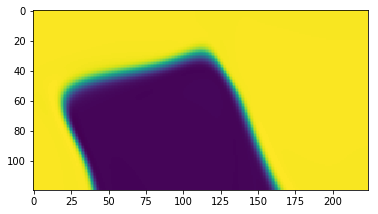

In [32]:
plt.imshow(u_pred[1])

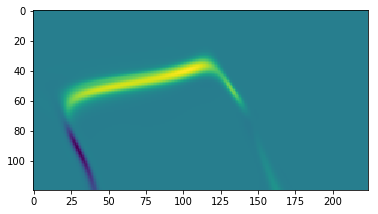

In [40]:
plt.imshow(u_t_pred[19])

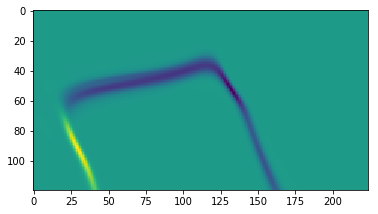

In [41]:
plt.imshow(u_x_pred[19])

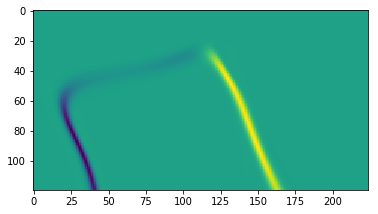

In [35]:
plt.imshow(u_y_pred[0])

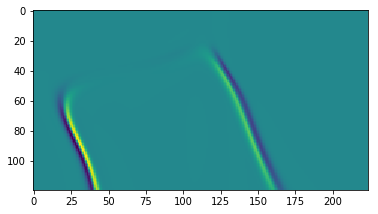

In [36]:
plt.imshow(u_yy_pred[0])

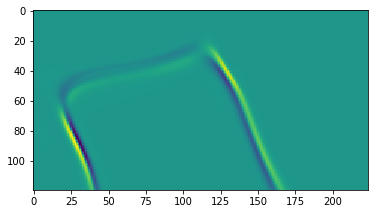

In [37]:
plt.imshow(u_xy_pred[0])

In [38]:
np.save('train_data_experiment_2D',np.vstack([u_pred.flatten(),u_x_pred.flatten(),u_y_pred.flatten(),u_xx_pred.flatten(),u_xy_pred.flatten(), u_yy_pred.flatten(), u_t_pred.flatten()]).T)

In [13]:
data = np.load('train_data_experiment_2D.npy')

In [14]:
data.shape

(2688000, 7)

In [22]:
mask = data[:,-1] > 0.01

In [23]:
np.sum(mask)

172201

In [24]:
data = np.reshape(data, (100, 120, 224,) + (7,))

In [25]:
data.shape

(100, 120, 224, 7)

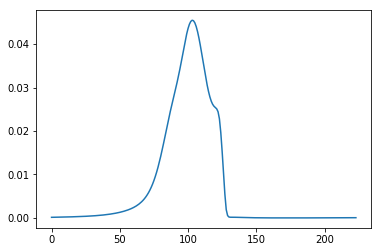

In [26]:
plt.plot(data[20,40,:,-1])

In [11]:
import matplotlib.pyplot as plt

In [ ]:
mask = data[:,]

(array([1.336000e+03, 8.380000e+03, 2.451849e+06, 9.573800e+04,
        6.761000e+04, 4.590000e+04, 1.273800e+04, 2.674000e+03,
        1.322000e+03, 4.530000e+02]),
 array([-0.03450239, -0.0215453 , -0.0085882 ,  0.00436889,  0.01732599,
         0.03028308,  0.04324018,  0.05619727,  0.06915437,  0.08211146,
         0.09506856], dtype=float32),
 <a list of 10 Patch objects>)

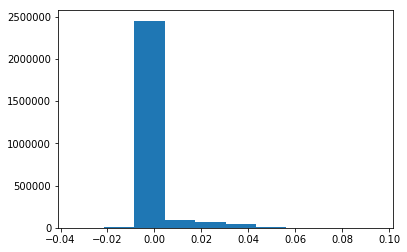

In [12]:
plt.hist(data[:,:,:,-1].flatten())